# **Assignment-3**

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df=pd.read_csv('/content/dataset_model.csv',sep=',')
df.shape

(614, 13)

In [44]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [45]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [46]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## **Perform Exploratory Data Analysis , Data Cleaning & Feature Engg on the Training dataset**
### Idenitfy & Remove the field that is providing only unique information about records .Capture it in another dataframe

In [47]:
for i in df.columns:
  print('{} is unique: {}'.format(i, df[i].is_unique))

Loan_ID is unique: True
Gender is unique: False
Married is unique: False
Dependents is unique: False
Education is unique: False
Self_Employed is unique: False
ApplicantIncome is unique: False
CoapplicantIncome is unique: False
LoanAmount is unique: False
Loan_Amount_Term is unique: False
Credit_History is unique: False
Property_Area is unique: False
Loan_Status is unique: False


So,The Loan_ID is the field that provides unique information about the records.

In [50]:
df=df.drop('Loan_ID',axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Identifying Continous & Categorical Columns


In [0]:
len(df['Gender'].unique())

3

In [0]:
len(df['Married'].unique())

3

In [0]:
len(df['Dependents'].unique())

5

In [0]:
len(df['Education'].unique())

2

In [0]:
len(df['Self_Employed'].unique())

3

In [0]:
len(df['ApplicantIncome'].unique())

505

In [0]:
len(df['CoapplicantIncome'].unique())

287

In [0]:
len(df['LoanAmount'].unique())

204

In [0]:
len(df['Loan_Amount_Term'].unique())

11

In [0]:
len(df['Credit_History'].unique())

3

In [0]:
len(df['Property_Area'].unique())

3

In [0]:
len(df['Loan_Status'].unique())

2



*   Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status are finite small set of values. So, They are Categorial Columns.
*   ApplicantIncome,CoapplicantIncome,LoanAmount are large set of values. So, They are continuous columns.




### Performing Uni-variate Analysis with Plots.Record your Observations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd54b2e898>,
      dtype=object)

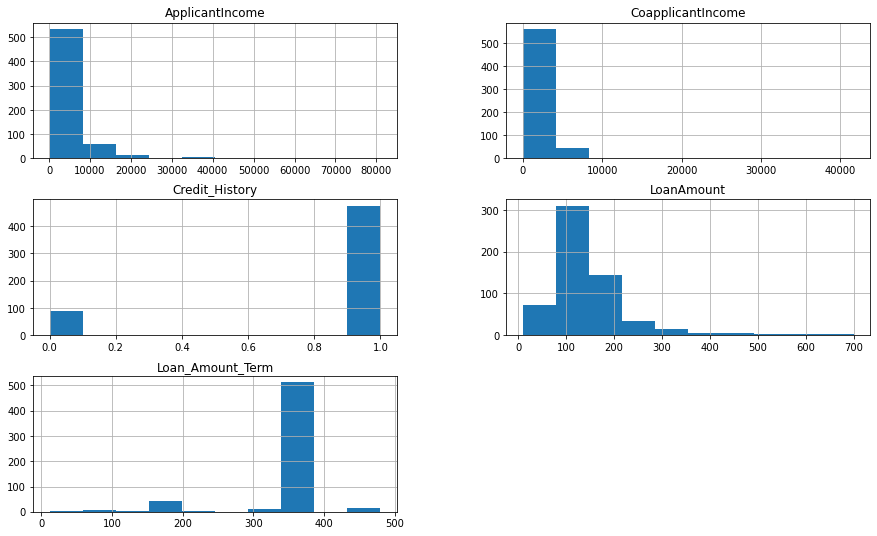

In [0]:
df.hist(figsize=[15,9])



*   Most of the ApplicantIncome  and CoapplicantIncome is less than 10000.
*   People choose the Loan_amount_Term in the range of 350 to 400.



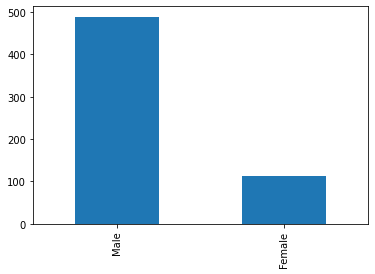

In [0]:
df['Gender'].value_counts().plot.bar()

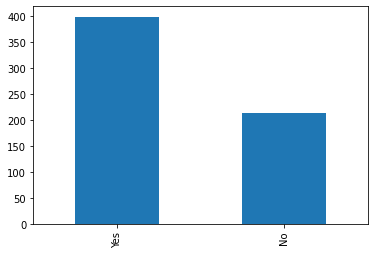

In [0]:
df['Married'].value_counts().plot.bar()

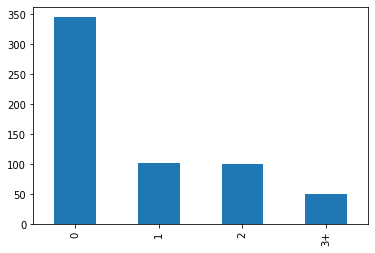

In [0]:
df['Dependents'].value_counts().plot.bar()

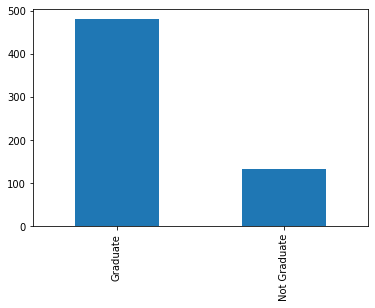

In [0]:
df['Education'].value_counts().plot.bar()

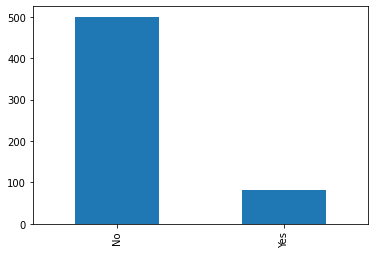

In [0]:
df['Self_Employed'].value_counts().plot.bar()

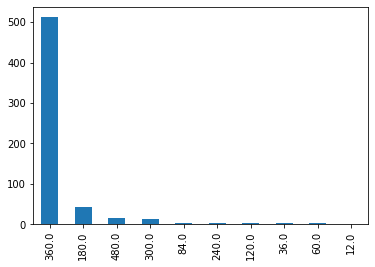

In [0]:
df['Loan_Amount_Term'].value_counts().plot.bar()

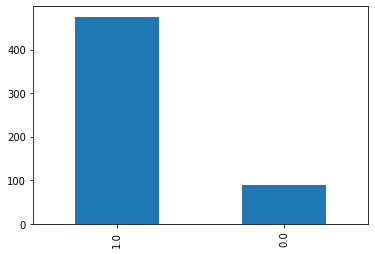

In [0]:
df['Credit_History'].value_counts().plot.bar()

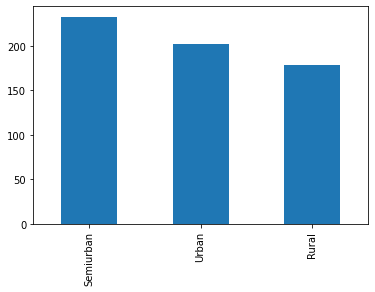

In [0]:
df['Property_Area'].value_counts().plot.bar()

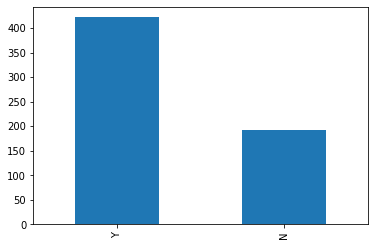

In [0]:
df['Loan_Status'].value_counts().plot.bar()



*   There are more  number of males than females.
*   Most of the people are Married and Graduate.


*   Most of the people has credit history as 1.

*   Maximum of the people were given the loan.










### Perform Bi-variate Analysis among all Independent variables.Draw appropriate Plots , mention observations

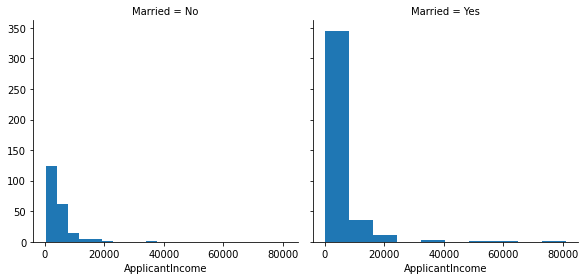

In [53]:
fn = sns.FacetGrid(df,col='Married',col_wrap=4,height=4)
fn = fn.map(plt.hist,'ApplicantIncome')

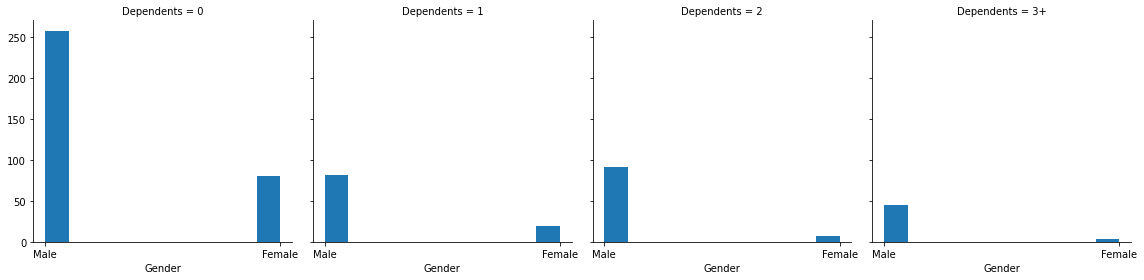

In [56]:
fn = sns.FacetGrid(df,col='Dependents',col_wrap=4,height=4)
fn = fn.map(plt.hist,'Gender')

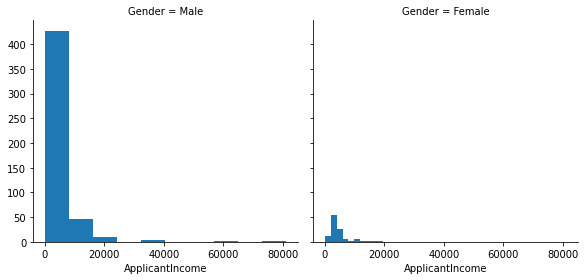

In [55]:
fn = sns.FacetGrid(df,col='Gender',col_wrap=4,height=4)
fn = fn.map(plt.hist,'ApplicantIncome')

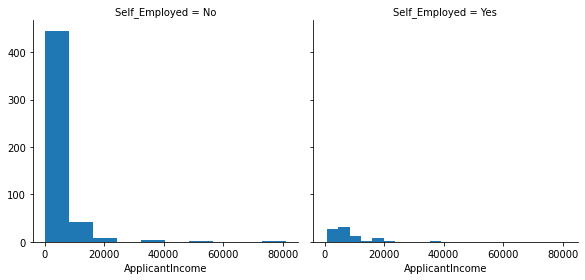

In [57]:
fn = sns.FacetGrid(df,col='Self_Employed',col_wrap=4,height=4)
fn = fn.map(plt.hist,'ApplicantIncome')

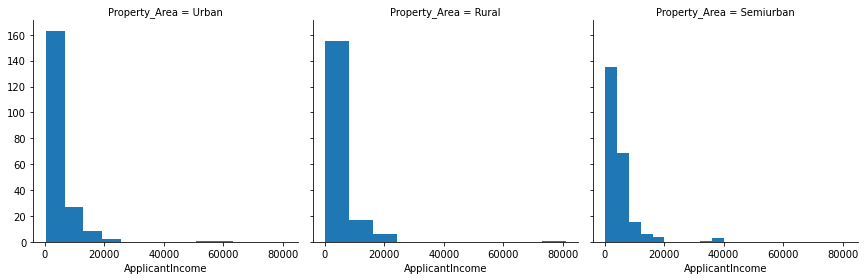

In [58]:
fn = sns.FacetGrid(df,col='Property_Area',col_wrap=4,height=4)
fn = fn.map(plt.hist,'ApplicantIncome')


*   Married persons has more income than unmarried persons.
*   Male with 0 dependency are more than the females .


*   Self employment is yes then the applicantincome is less. And Self employment is no then the applicantincome is more.
*   Property area in urban is more applicani income than rural and semiurban area.

### Perform Bi-variate Analysis between Target Variable and each Independent variable. Use suitable plot , mention observations,trends etc

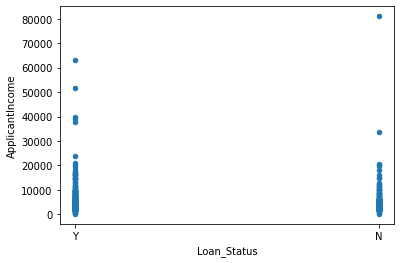

In [0]:
df.plot.scatter(x='Loan_Status',y='ApplicantIncome')

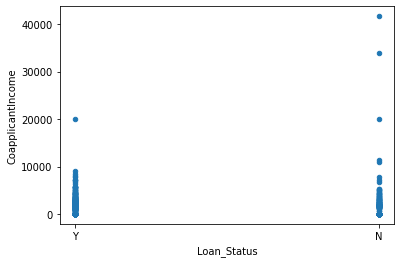

In [0]:
df.plot.scatter(x='Loan_Status',y='CoapplicantIncome')

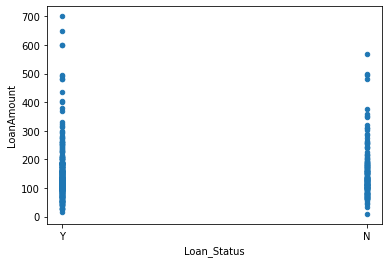

In [0]:
df.plot.scatter(x='Loan_Status',y='LoanAmount')

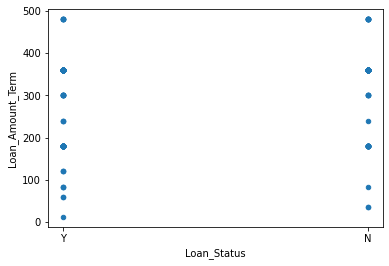

In [0]:
df.plot.scatter(x='Loan_Status',y='Loan_Amount_Term')

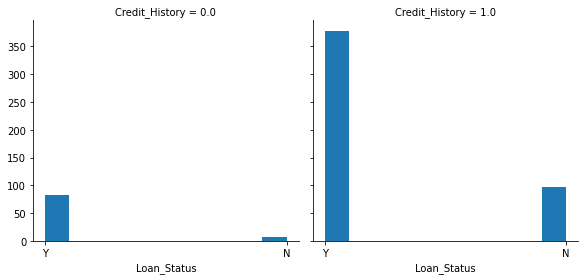

In [0]:
fn = sns.FacetGrid(df,col='Credit_History',col_wrap=4,height=4)
fn = fn.map(plt.hist,'Loan_Status')

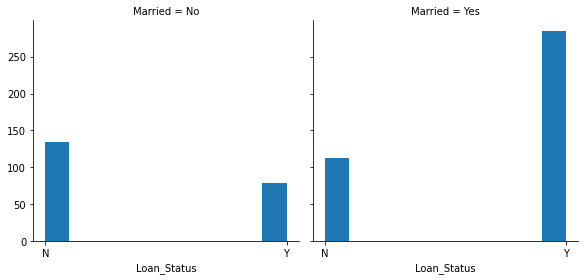

In [0]:
fn = sns.FacetGrid(df,col='Married',col_wrap=4,height=4)
fn = fn.map(plt.hist,'Loan_Status')

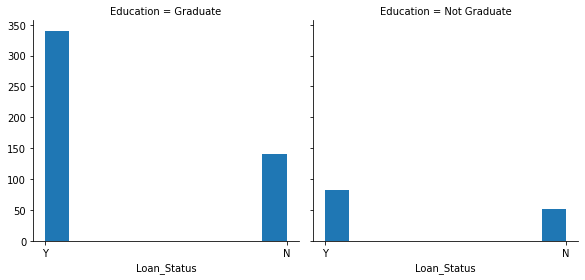

In [0]:
fn = sns.FacetGrid(df,col='Education',col_wrap=4,height=4)
fn = fn.map(plt.hist,'Loan_Status')

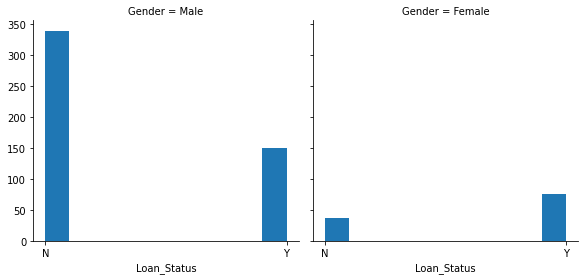

In [0]:
fn = sns.FacetGrid(df,col='Gender',col_wrap=4,height=4)
fn = fn.map(plt.hist,'Loan_Status')

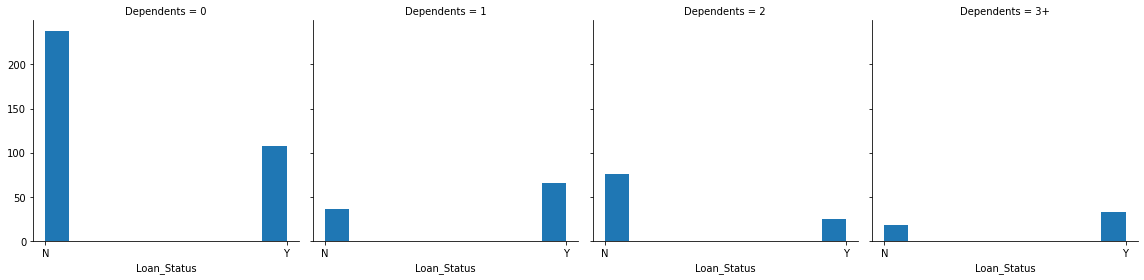

In [0]:
fn = sns.FacetGrid(df,col='Dependents',col_wrap=4,height=4)
fn = fn.map(plt.hist,'Loan_Status')

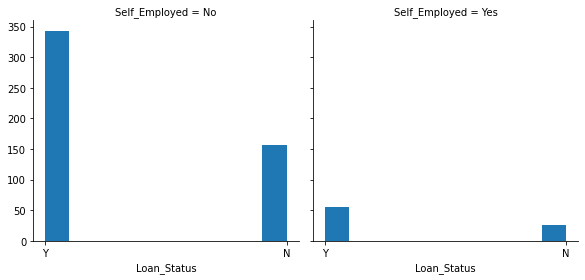

In [0]:
fn = sns.FacetGrid(df,col='Self_Employed',col_wrap=4,height=4)
fn = fn.map(plt.hist,'Loan_Status')

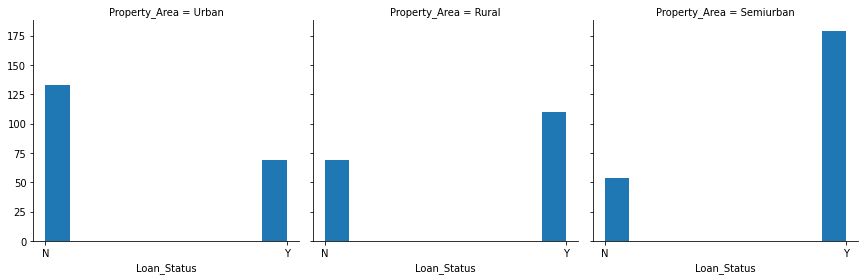

In [59]:
fn = sns.FacetGrid(df,col='Property_Area',col_wrap=4,height=4)
fn = fn.map(plt.hist,'Loan_Status')


*   More males than females.
*   Married persons has more likely to have loan.

*  Most the people are graduates and more likely to have loan .
*  Dependents 0 has maximum among the 0,1,2,3+.And more likely to have loan.

*   Maximum number of people are not self employed.
*  Semi urban area has more likely to grant loan.

*   Credit history with 1.0 has more likely to grant loan.

### How is the class distribution (Y/N) in Label(Target) Variable ?

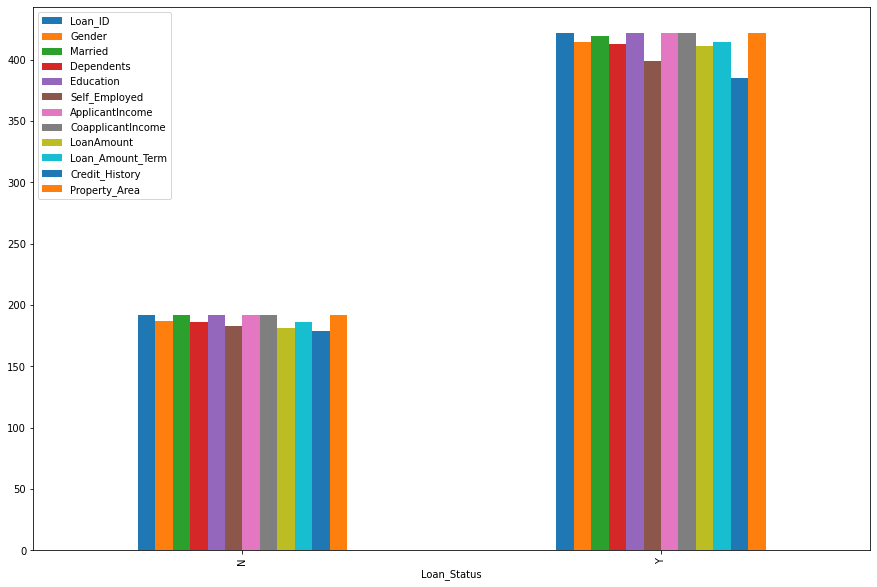

In [0]:
df.groupby('Loan_Status').count().plot.bar(figsize=[15,10])

### Identify the Independent Variables that have missing values.

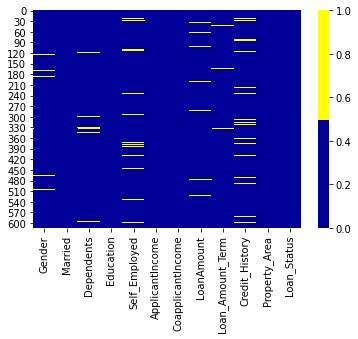

In [51]:
cols = df.columns
colours = ['#000099', '#ffff00']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

From heatmap we can see that Gender , Married , Dependents, Self_Employed , LoanAmount ,Loan_Amount_Term,Credit_history has some missing values.

In [52]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Gender - 2.0%
Married - 0.0%
Dependents - 2.0%
Education - 0.0%
Self_Employed - 5.0%
ApplicantIncome - 0.0%
CoapplicantIncome - 0.0%
LoanAmount - 4.0%
Loan_Amount_Term - 2.0%
Credit_History - 8.0%
Property_Area - 0.0%
Loan_Status - 0.0%


### Handle missing values appropriately , explain the technique applied for each case

In [0]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())
df['Self_Employed']=df['Self_Employed'].fillna(method='ffill')
df['Dependents']=df['Dependents'].fillna(method='ffill')
df['Married']=df['Married'].fillna(method='ffill')
df['Gender']=df['Gender'].fillna(method='ffill')

In [66]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Gender - 0.0%
Married - 0.0%
Dependents - 0.0%
Education - 0.0%
Self_Employed - 0.0%
ApplicantIncome - 0.0%
CoapplicantIncome - 0.0%
LoanAmount - 0.0%
Loan_Amount_Term - 0.0%
Credit_History - 0.0%
Property_Area - 0.0%
Loan_Status - 0.0%


### Identify the Outliers in each Independent Variable.Distribute the data in each field using Quartile bins (0-25%,25%-50%,50%-75%,75%-100% iles)

In [67]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


### Use Box-Plot chart to represent the Outliers for each Independent Variable

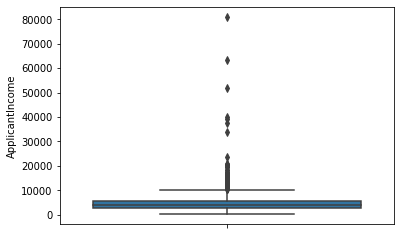

In [60]:
sns.boxplot(y=df['ApplicantIncome'])
#It contains more outliers

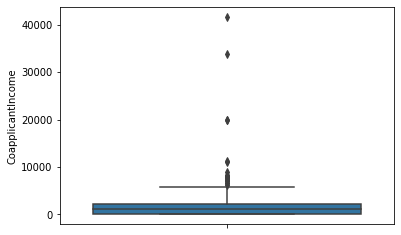

In [61]:
sns.boxplot(y=df['CoapplicantIncome'])
#It contains some outliers

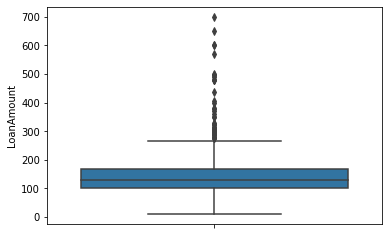

In [62]:
sns.boxplot(y=df['LoanAmount'])
# It contains many ouliers

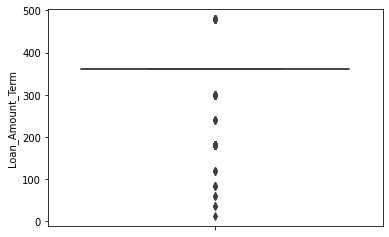

In [64]:
sns.boxplot(y=df['Loan_Amount_Term'])
#It contains one outlier

### Perform treatment of these Outliers using appropriate techniqies.Explain your approach

In [70]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75) 
IQR=Q3-Q1
print(((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).sum())

ApplicantIncome      50
CoapplicantIncome    18
Credit_History       89
Dependents            0
Education             0
Gender                0
LoanAmount           41
Loan_Amount_Term     88
Loan_Status           0
Married               0
Property_Area         0
Self_Employed         0
dtype: int64


In [72]:
no_outlier=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Before remoivng outlier: ",df.shape)
print("After removing oultiers: ",no_outlier.shape)

Before remoivng outlier:  (614, 12)
After removing oultiers:  (396, 12)


**Step-1**


Perform Label Encoding on Target Variable (Loan_Status).

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [74]:
le = LabelEncoder()
en=df.copy()
en['Loan_Status'] = le.fit_transform(en['Loan_Status'])
en.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


**Step 2**

Perform Label Encoding on Categorical Independent Variables.

In [80]:
aa=list(set(df.columns)-set(df._get_numeric_data().columns))
print(aa)
en=df.copy()
for j in aa:
  en['en_'+str(j)] = le.fit_transform(en[j])

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


What is the shape of dataframe post Categorical Encoding ?

In [81]:
print("The shape after the enoding is : ",en.shape)
en = en.drop(columns = aa)
print("Shape after Dorping is : ",en.shape)

The shape after the enoding is :  (614, 19)
Shape after Dorping is :  (614, 12)


In [82]:
en.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,en_Gender,en_Married,en_Dependents,en_Education,en_Self_Employed,en_Property_Area,en_Loan_Status
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,2,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,1,2,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,1,0,2,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,2,1


Carry out Correlation analysis on this dataframe. Plot using HeatMap

In [84]:
corr = en.corr()
corr.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,en_Gender,en_Married,en_Dependents,en_Education,en_Self_Employed,en_Property_Area,en_Loan_Status
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615,0.046230,0.049052,0.115036,-0.140760,0.122728,-0.009500,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.086991,0.077760,0.026683,-0.062290,-0.021807,0.010522,-0.059187
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607,0.097577,0.147108,0.158914,-0.168759,0.111754,-0.046632,-0.033214
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.075813,-0.095364,-0.087210,-0.073928,-0.027941,-0.076120,-0.022549
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.005658,0.009519,-0.065459,-0.073658,0.006209,0.001963,0.540556


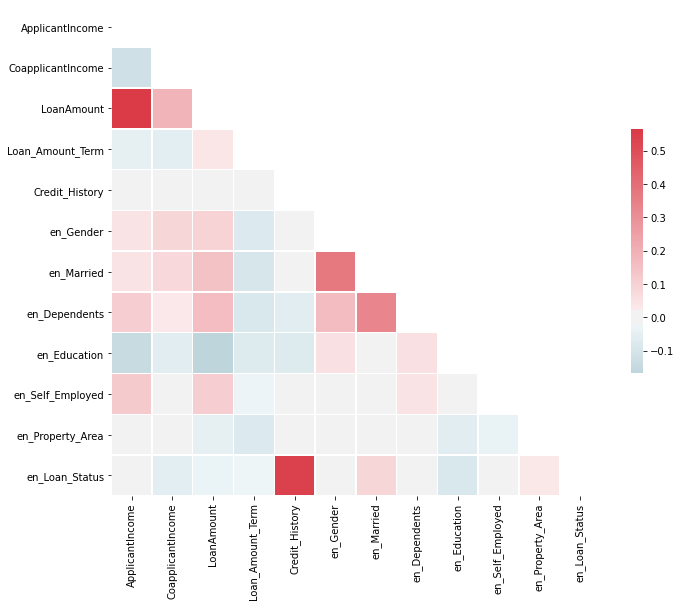

In [85]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
svm = sns.heatmap(corr, mask=mask, cmap=cmap, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})


Identify the variables that have strong correlation using Label Encoding( Correlation Coefficient > 0.5 or <0.5)

Credit_History , LoanAmount and Married have strong correlations.

**Step 3**

Perform One Hot Encoding on Categorical Independent Variables.

In [86]:
ohe = OneHotEncoder(handle_unknown='ignore')
hot=df.copy()
hot.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [87]:
print("Before one hot encoding : ",hot.shape)
for i in aa:
  enc_rel = pd.DataFrame(ohe.fit_transform(hot[[i]]).toarray())
  enc_rel = enc_rel.add_prefix(i+'_')
  hot = hot.join(enc_rel)

Size of dataset before OHE :  (614, 12)


What is the shape of dataframe post OHE Encoding ?

In [88]:
print("After one hot encoding : ",hot.shape)
hot = hot.drop(columns = aa)
print("Size of dataset after dropping the columns : ",hot.shape)

After one hot encoding :  (614, 29)
Size of dataset after dropping the columns :  (614, 22)


In [89]:
hot.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_0,Gender_1,Married_0,Married_1,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_0,Education_1,Self_Employed_0,Self_Employed_1,Property_Area_0,Property_Area_1,Property_Area_2,Loan_Status_0,Loan_Status_1
0,5849,0.0,128.0,360.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,4583,1508.0,128.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3000,0.0,66.0,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,2583,2358.0,120.0,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6000,0.0,141.0,360.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


Carry out Correlation analysis on this dataframe. Plot using HeatMap

In [90]:
hot_corr=hot.corr()
hot_corr.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_0,Gender_1,Married_0,Married_1,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_0,Education_1,Self_Employed_0,Self_Employed_1,Property_Area_0,Property_Area_1,Property_Area_2,Loan_Status_0,Loan_Status_1
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.046230,0.046230,-0.049052,0.049052,-0.089291,0.040412,-0.037928,0.156687,0.140760,-0.140760,-0.122728,0.122728,0.015829,-0.014246,-0.000598,0.004710,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134,-0.086991,0.086991,-0.077760,0.077760,-0.006026,-0.025532,0.002931,0.041491,0.062290,-0.062290,0.021807,-0.021807,0.005329,-0.027044,0.022776,0.059187,-0.059187
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.097577,0.097577,-0.147108,0.147108,-0.142156,0.058578,0.016162,0.152850,0.168759,-0.168759,-0.111754,0.111754,0.043467,-0.005804,-0.036050,0.033214,-0.033214
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705,0.075813,-0.075813,0.095364,-0.095364,0.100085,-0.085436,0.010409,-0.077273,0.073928,-0.073928,0.027941,-0.027941,0.034321,0.059141,-0.094279,0.022549,-0.022549
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000,-0.005658,0.005658,-0.009519,0.009519,0.049742,0.000924,-0.021872,-0.060473,0.073658,-0.073658,-0.006209,0.006209,-0.020906,0.035976,-0.016934,-0.540556,0.540556


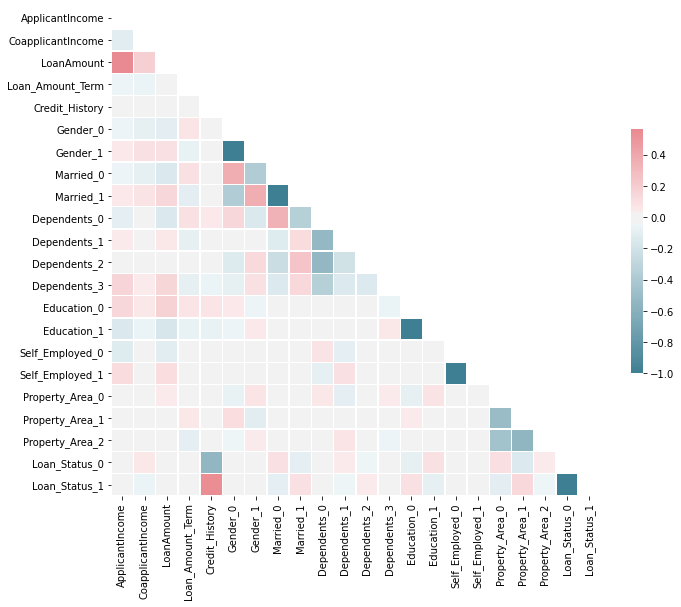

In [92]:
mask = np.zeros_like(hot_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
svm = sns.heatmap(hot_corr, mask=mask, cmap=cmap, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

Identify the variables that have strong correlation using OHE ( Correlation Coefficient > 0.5 or <0.5)

Gender, Married, Education, Self_Employed and Loan_Status have strong correlations.